In [69]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix

In [70]:
#IMPORTING & LOADING THE DATASET
#Labels of the dataset:
# 0 - Airplanes
# 1 - Cars 
# 2 - Birds
# 3 - Cats
# 4 - Deer
# 5 - Dogs
# 6 - Frogs
# 7 - Horses
# 8 - Ships
# 9 - Trucks

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [71]:
#PRINTING THE SHAPE

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


Label:  [4]


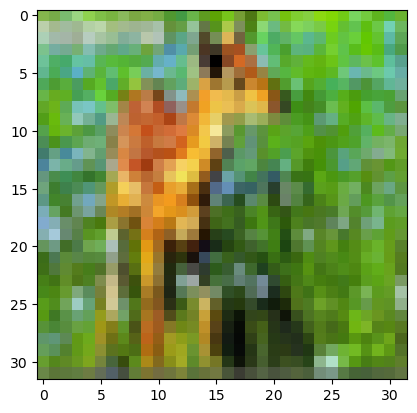

In [72]:
#VISUALIZING THE DATASET TO CONFIRM IMAGE AND LABELS

i = 1005
plt.imshow(X_train[i])
print("Label: ", y_train[i])


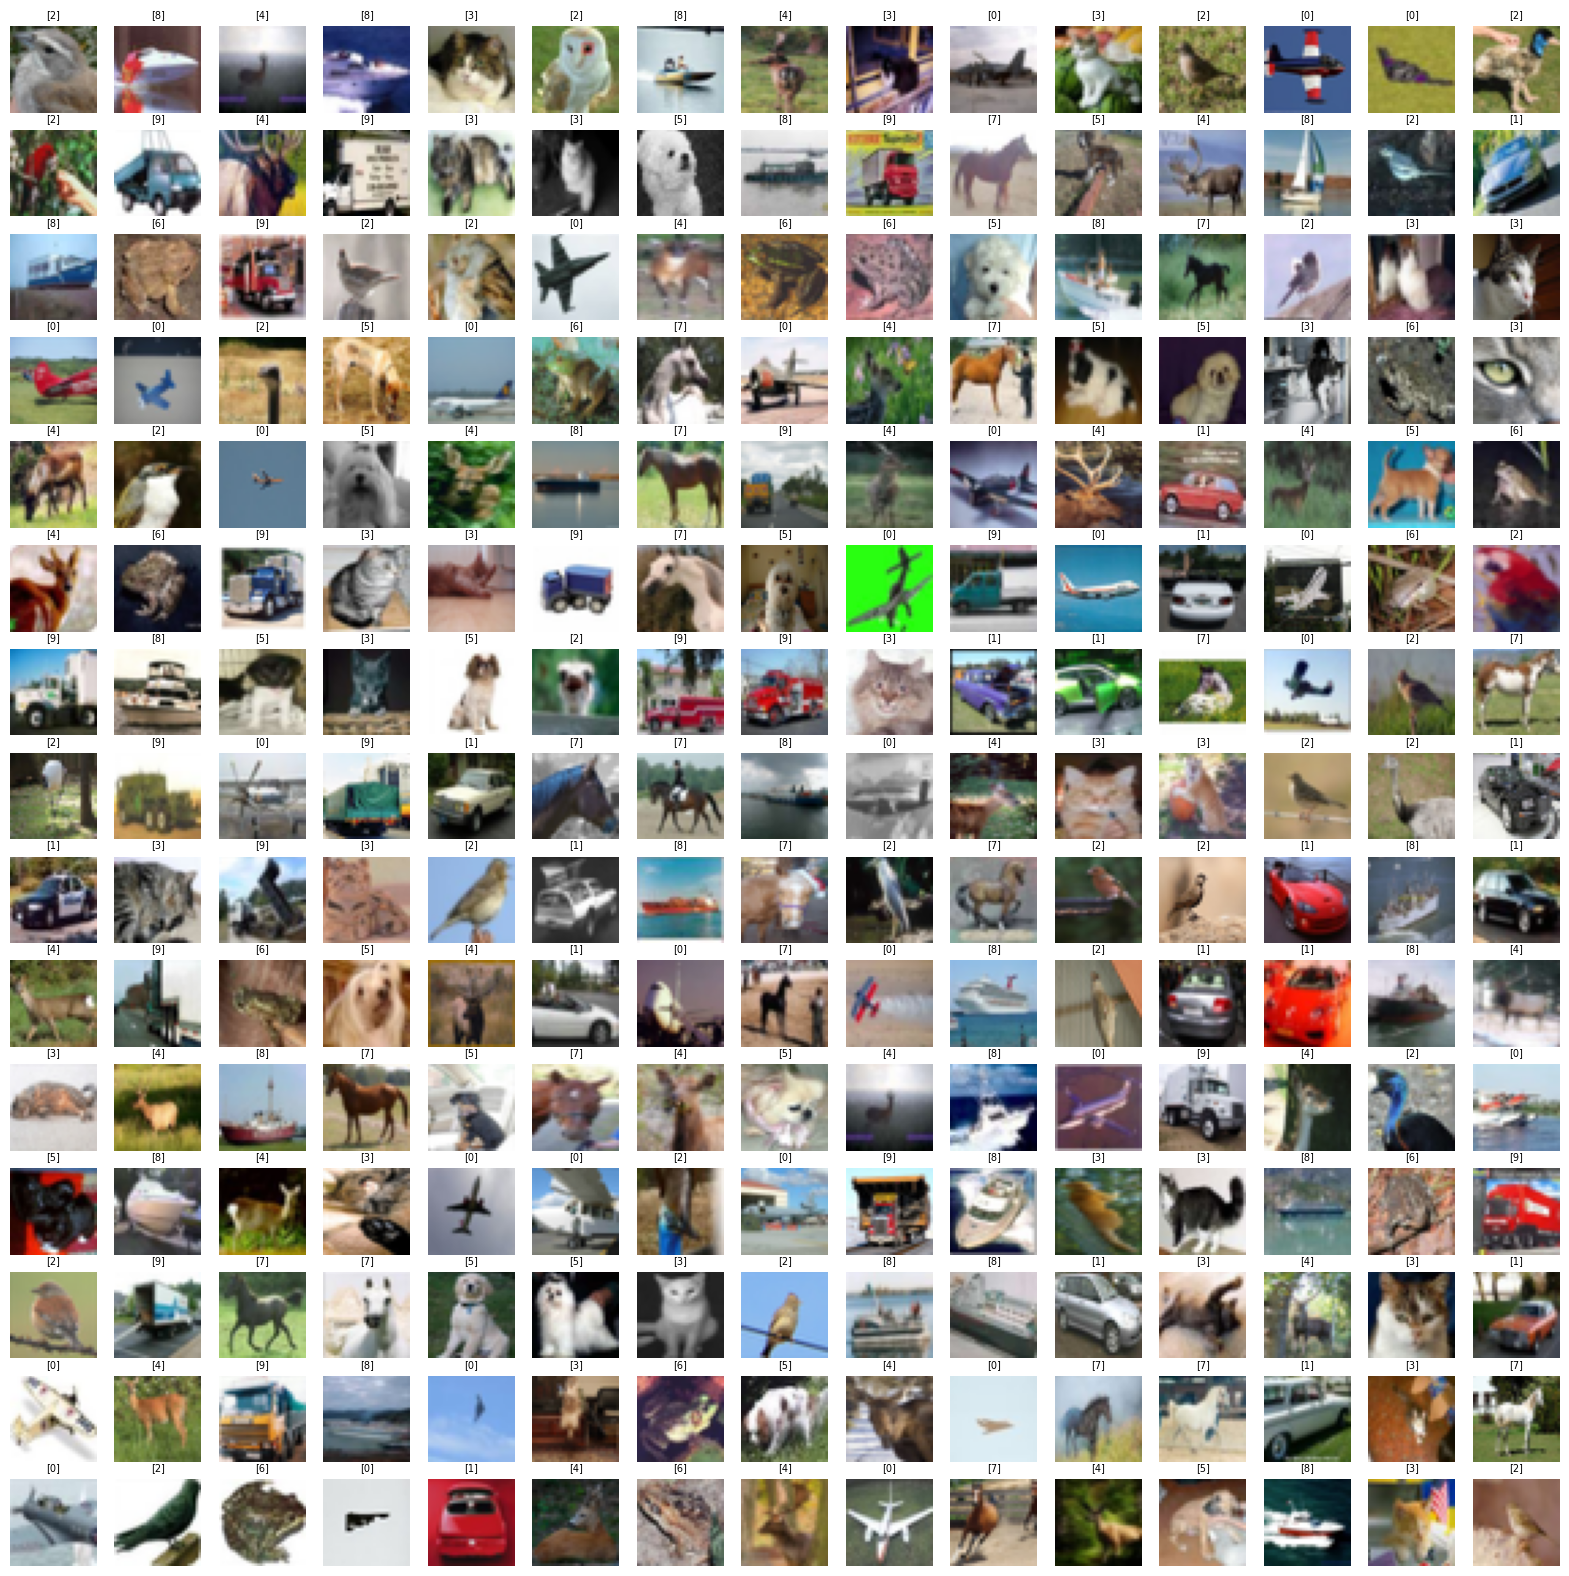

In [73]:
#PRINTING A MATRIX OF IMAGES  AND LABELS AT RANDOM

W_grid = 15
L_grid = 15
n_training = len(X_train)

fig, axes = plt.subplots(L_grid, W_grid, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 7)
    axes[i].axis('off')

In [74]:
#PREPARING THE DATA BY CONVERTING THE DATA TYPE

#Converting the data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Coverting the data to binary
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
#y_train
#y_test

In [75]:
#NORMALIZING THE DATA

X_train = X_train / 255
X_test = X_test / 255
#X_train
#X_test

In [76]:
#RESHAPING THE DATA

Input_shape = X_train.shape[1:]
#Input_shape

In [ ]:
#BUILDING THE CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

#Initializing
cnn = Sequential()

#First Convolutional Layer
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding= 'same', input_shape = Input_shape))

#Batch Normalization Layer
cnn.add(BatchNormalization())

#Second Convolutional Layer
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same'))

#Batch Normalization Layer
cnn.add(BatchNormalization())

#Pooling Layer
cnn.add(MaxPooling2D(pool_size = (2,2)))

#Dropout Layer - to prevent overfitting
cnn.add(Dropout(0.25))

#Third Convolutional Layer
cnn.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding='same'))

#Batch Normalization Layer
cnn.add(BatchNormalization())

#Fourth Convolutional Layer
cnn.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding='same')) 

#Batch Normalization Layer
cnn.add(BatchNormalization())

#Pooling Layer
cnn.add(MaxPooling2D(pool_size = (2,2)))

#Drouput Layer - to prevent overfitting
cnn.add(Dropout(0.35))

#Fifth Convolutional Layer
cnn.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding='same'))

#Batch Normalization Layer
cnn.add(BatchNormalization())

#Sixth Convolutional Layer
cnn.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding='same'))

#Batch Normalization Layer
cnn.add(BatchNormalization())

#Pooling Layer
cnn.add(MaxPooling2D(pool_size = (2,2)))

#Dropout Layer
cnn.add(Dropout(0.45))

#Flattening Layer
cnn.add(Flatten())

#Fully Connected Layer
cnn.add(Dense(units = 512, activation = 'relu'))

#Dropout Layer
cnn.add(Dropout(0.5))

#Output Layer
cnn.add(Dense(units = 10, activation = 'softmax'))


/Users/sam/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
#COMPILING THE CNN

cnn.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate= 0.0005), metrics = ['accuracy'])

In [79]:
#TRAINING THE CNN

output = cnn.fit(X_train, y_train, batch_size = 32, epochs = 75, shuffle = True, validation_split=0.2)

Epoch 1/75
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 55ms/step - accuracy: 0.2884 - loss: 2.2378 - val_accuracy: 0.4751 - val_loss: 1.5459
Epoch 2/75
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 53ms/step - accuracy: 0.4950 - loss: 1.3996 - val_accuracy: 0.5613 - val_loss: 1.2535
Epoch 3/75
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.5861 - loss: 1.1642 - val_accuracy: 0.6572 - val_loss: 0.9701
Epoch 4/75
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 54ms/step - accuracy: 0.6450 - loss: 1.0212 - val_accuracy: 0.7156 - val_loss: 0.8196
Epoch 5/75
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.6769 - loss: 0.9247 - val_accuracy: 0.7150 - val_loss: 0.8221
Epoch 6/75
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 57ms/step - accuracy: 0.7052 - loss: 0.8409 - val_accuracy: 0.7595 - val_loss: 0.7115
Epoch 7/75
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.7230 - loss: 0.7933 - val_accuracy: 0.7646 - val_loss: 0.6944
Epoch 8/75
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.7460 -

In [80]:
#LISTING THE KEYS OF THE OUTPUT HISTORY

output.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0, 0.5, 'Loss')

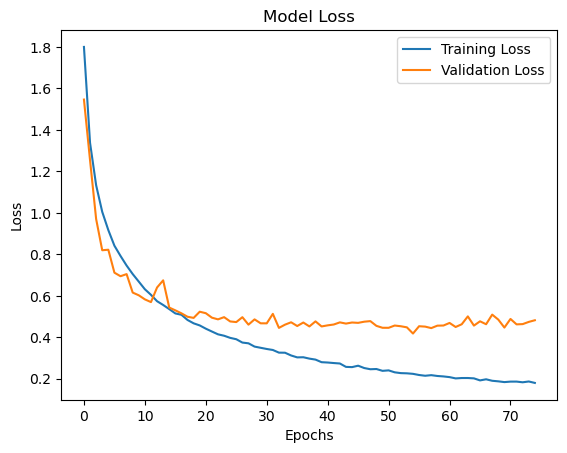

In [81]:
#PLOTTING LOSS VALUES

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


In [82]:
#EVALUATING THE CNN

evaluation = cnn.evaluate(X_test, y_test)
print("Test Accuracy: {}".format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8562 - loss: 0.5102
Test Accuracy: 0.8532000184059143


In [83]:
#MAKING PREDICTIONS

y_prob = cnn.predict(X_test)
predicted_classes = np.argmax(y_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [84]:
#RE-CONVERTING TEST LABELS TO ORIGINAL FORM

y_test_labels = np.argmax(y_test, axis=1)

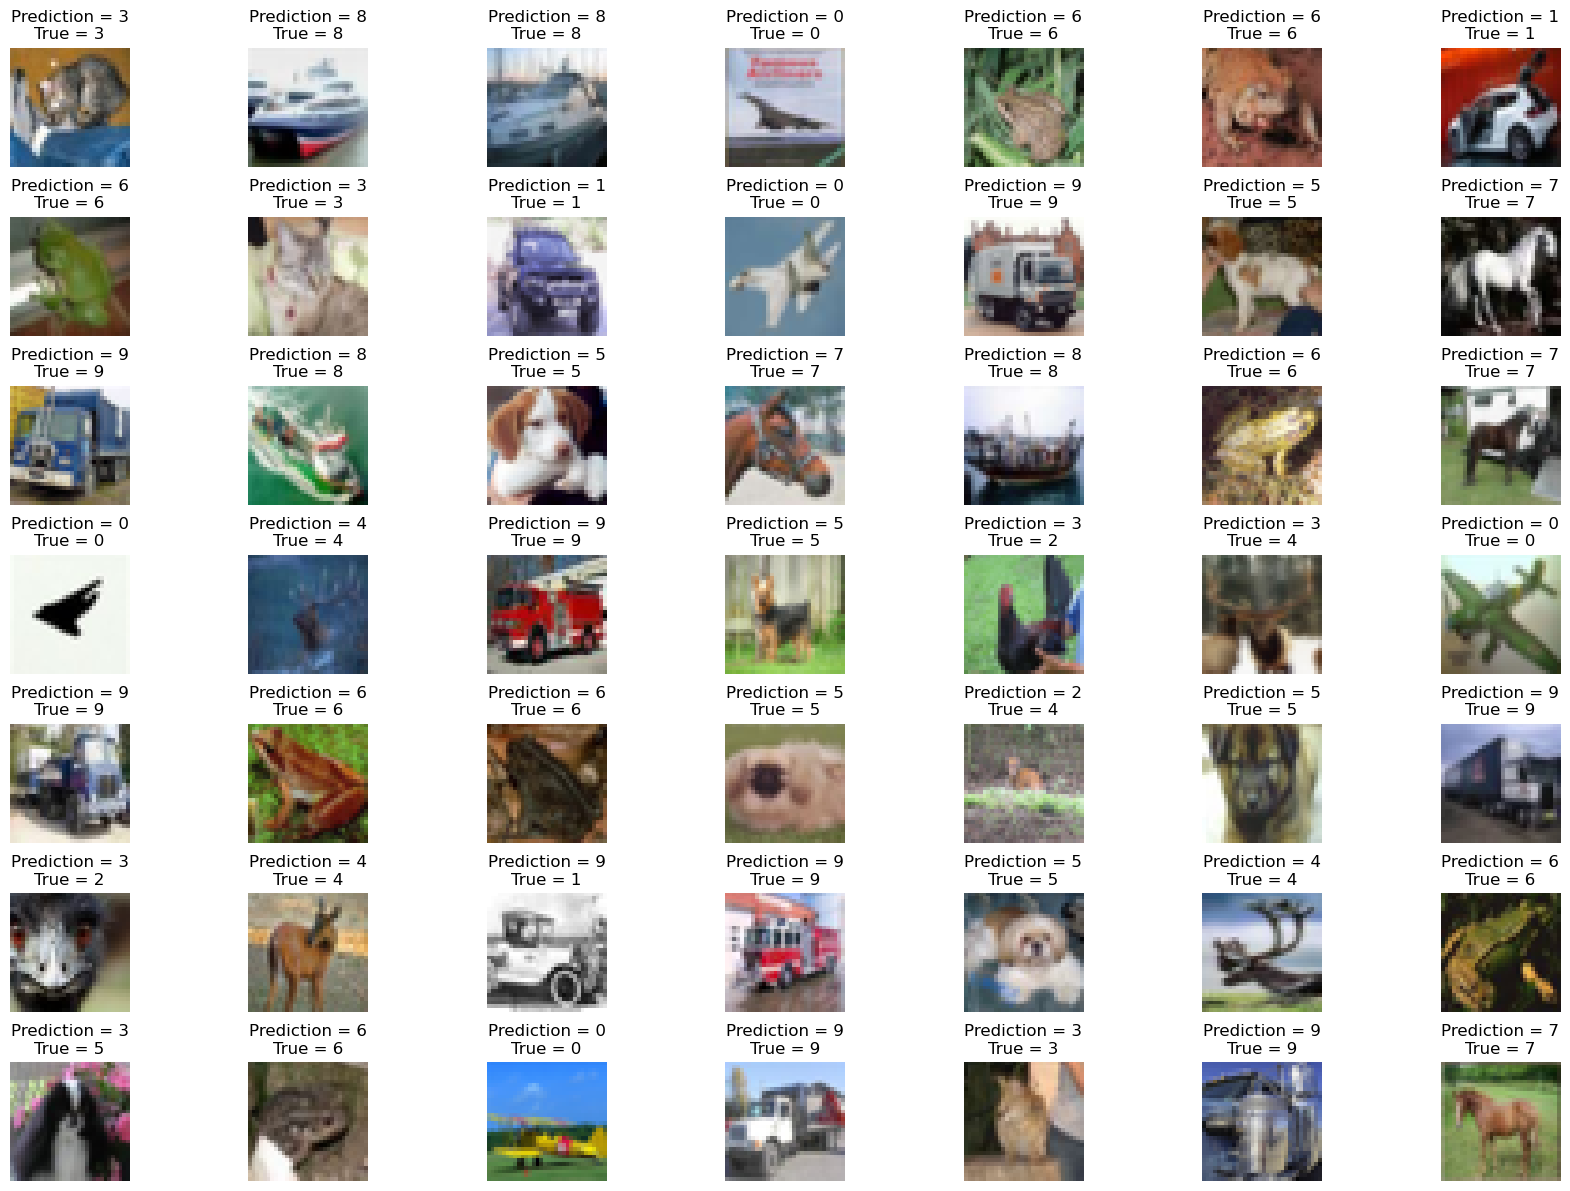

In [85]:
#PLOTTING PREDICTIONS TO TRUE VALUES

L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(20, 15))
axes = axes.ravel()  # Flatten the 2D array of axes

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])  # RGB image (32x32x3)
    axes[i].set_title(f'Prediction = {predicted_classes[i]}\nTrue = {y_test_labels[i]}')
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)


<Axes: >

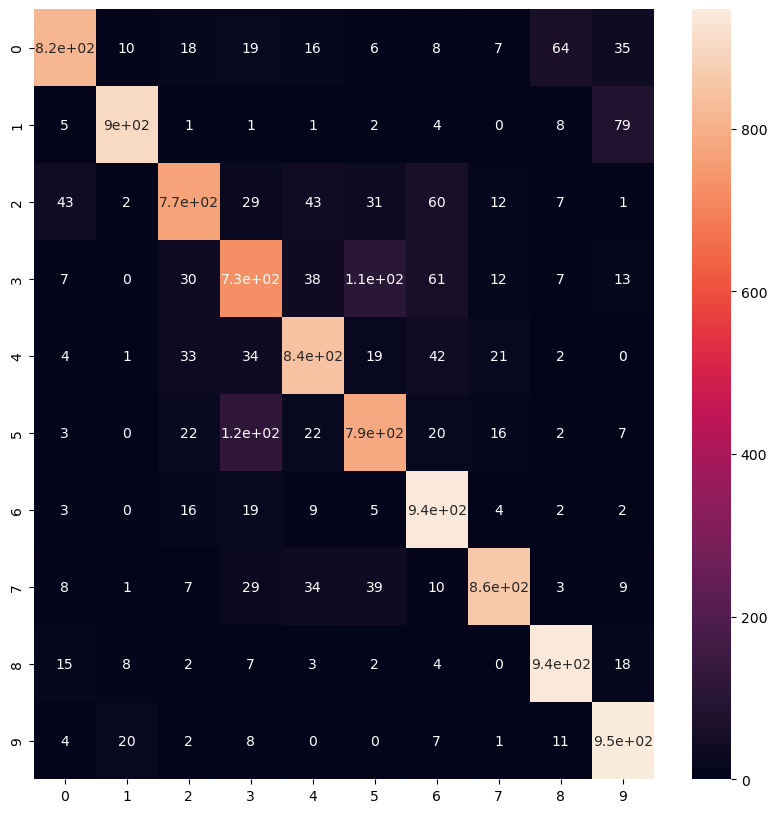

In [86]:
#CHECKING AND PLOTTING THE CONFUSION MATRIX

cm = confusion_matrix(y_test_labels, predicted_classes)
#cm

#Plotting the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)